In [42]:
%reload_ext autoreload
%autoreload 2
%config autocompleter.use_jedi=False

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits import mplot3d
import seaborn as sns

In [44]:
res = pd.read_csv("results.csv")
res.shape

(5440, 13)

In [45]:
# Preprocessing: removing NANs, INFs, ZERO cols, Mean != 0.0 rows
res.replace(np.nan, 0, inplace=True)
res.replace(np.inf, 0, inplace=True)

first_zero = res[res['Dimensions'] == 0].iloc[0, 0]
res = res.iloc[:first_zero]
res = res[res["Mean"] == 0.0]
res.abs_deviation_data.clip(upper=1000, inplace=True)
res.abs_deviation_eigv.clip(upper=1000, inplace=True)
res.rel_deviation_data.clip(upper=200, inplace=True)
res.rel_deviation_eigv.clip(upper=200, inplace=True)
res.shape

(1580, 13)

In [46]:
res.head()

,Unnamed: 0,Scaled,N,Dimensions,K,Mean,Variance,abs_deviation_data,abs_deviation_eigv,rel_deviation_data,rel_deviation_eigv,time_16,time_32
0,0,True,100,10,3,0.0,1.0,0.000141,0.000691,0.022098,0.003490,0.000868,0.000852
1,1,False,100,10,3,0.0,1.0,0.000018,0.000252,0.012426,0.000033,0.001023,0.007983
2,2,True,200,10,3,0.0,1.0,0.000060,0.064411,0.664818,0.671881,0.000881,0.000866
3,3,False,200,10,3,0.0,1.0,0.000026,0.000179,0.000950,0.001006,0.001049,0.000983
4,4,True,500,10,3,0.0,1.0,0.000048,0.000187,0.003130,0.003078,0.000871,0.000860


In [47]:
scaled = res[res['Scaled'] == True]
nscaled= res[res['Scaled'] == False]
scaled.shape, nscaled.shape

((790, 13), (790, 13))

In [48]:
scaled.describe()

,Unnamed: 0,N,Dimensions,K,Mean,Variance,abs_deviation_data,abs_deviation_eigv,rel_deviation_data,rel_deviation_eigv,time_16,time_32
count,790.000000,7.900000e+02,790.000000,790.0,790.0,790.000000,790.000000,7.900000e+02,790.000000,790.000000,790.000000,790.000000
mean,2305.556962,1.068911e+06,148.860759,3.0,0.0,10925.200000,0.000101,3.236180e-02,2.507013,1.153318,0.004726,0.006021
std,1529.610098,2.417857e+06,137.467474,0.0,0.0,20615.156688,0.000088,5.331661e-02,11.900914,3.144815,0.006885,0.007555
min,0.000000,1.000000e+02,10.000000,3.0,0.0,1.000000,0.000000,4.133016e-08,0.000000,0.000038,0.000242,0.000261
25%,1162.500000,1.000000e+03,50.000000,3.0,0.0,16.000000,0.000034,2.971441e-04,0.455532,0.662899,0.000883,0.001014
50%,2325.000000,2.000000e+04,100.000000,3.0,0.0,320.000000,0.000078,1.416683e-02,0.772853,0.953708,0.001751,0.001851
75%,3487.500000,5.000000e+05,200.000000,3.0,0.0,8192.000000,0.000141,3.482177e-02,1.455466,1.303034,0.005541,0.007762
max,4650.000000,1.000000e+07,400.000000,3.0,0.0,65519.000000,0.000420,2.664159e-01,200.000000,65.361542,0.027927,0.026858


In [49]:
nscaled.describe()

,Unnamed: 0,N,Dimensions,K,Mean,Variance,abs_deviation_data,abs_deviation_eigv,rel_deviation_data,rel_deviation_eigv,time_16,time_32
count,790.000000,7.900000e+02,790.000000,790.0,790.0,790.000000,790.000000,7.900000e+02,790.000000,790.000000,790.000000,790.000000
mean,2306.556962,1.068911e+06,148.860759,3.0,0.0,10925.200000,0.017341,4.504727e-02,3.296864,2.378058,0.004362,0.005856
std,1529.610098,2.417857e+06,137.467474,0.0,0.0,20615.156688,0.048819,5.730370e-02,17.609058,11.564391,0.006403,0.007152
min,1.000000,1.000000e+02,10.000000,3.0,0.0,1.000000,0.000000,5.923054e-08,0.000000,0.000033,0.000260,0.000270
25%,1163.500000,1.000000e+03,50.000000,3.0,0.0,16.000000,0.000010,8.445470e-03,0.014508,0.736112,0.000864,0.001026
50%,2326.000000,2.000000e+04,100.000000,3.0,0.0,320.000000,0.000236,2.832380e-02,0.790384,1.029800,0.001743,0.001963
75%,3488.500000,5.000000e+05,200.000000,3.0,0.0,8192.000000,0.005521,4.745220e-02,1.717794,1.422257,0.004872,0.007676
max,4651.000000,1.000000e+07,400.000000,3.0,0.0,65519.000000,0.430651,3.187763e-01,200.000000,200.000000,0.028235,0.025535


# Plotting

In [50]:
def filter_df(df, filters):
    for key, value in filters.items():
        df = df[df[key] == value]
    return df

In [51]:
def get_np(df, cols):
    res = []
    for col in cols: res.append(df[col].to_numpy())
    return res

In [52]:
def normalize(array, shift=0.0, range=0.1):
    array -= array.min()
    array /= array.max()
    array *= range
    array += shift
    return array

In [53]:
def stats(array):
    print(pd.DataFrame(array).describe())

## Errors

#### 1. Graph with mean/var on x-y axis, and errors expressed in colors: dimensions 400

In [54]:
n_vals = scaled.N.unique()
d_vals = scaled.Dimensions.unique()

In [55]:
d_vals

array([ 10,  50, 100, 200, 400])

In [56]:
def get_var_err_data(n=100000, dims=400, err="rel_deviation_data", df=scaled):
    df = filter_df(df, {"N":n, "Dimensions":dims})
    variances, err_data = get_np(df, ['Variance', err])
    return variances, err_data

In [57]:
rel_data = {d:{n:get_var_err_data(n, d, "rel_deviation_data", scaled) for n in n_vals} for d in d_vals}

In [58]:
fancy_err_name = {"rel_deviation_data":"Relative Error: Reduced Data", 
                  "rel_deviation_eigv":"Relative Error: Eigen Values",
                  "abs_deviation_data":"Absolute Error: Reduced Data", 
                  "abs_deviation_eigv":"Absolute Error: Eigen Values"}

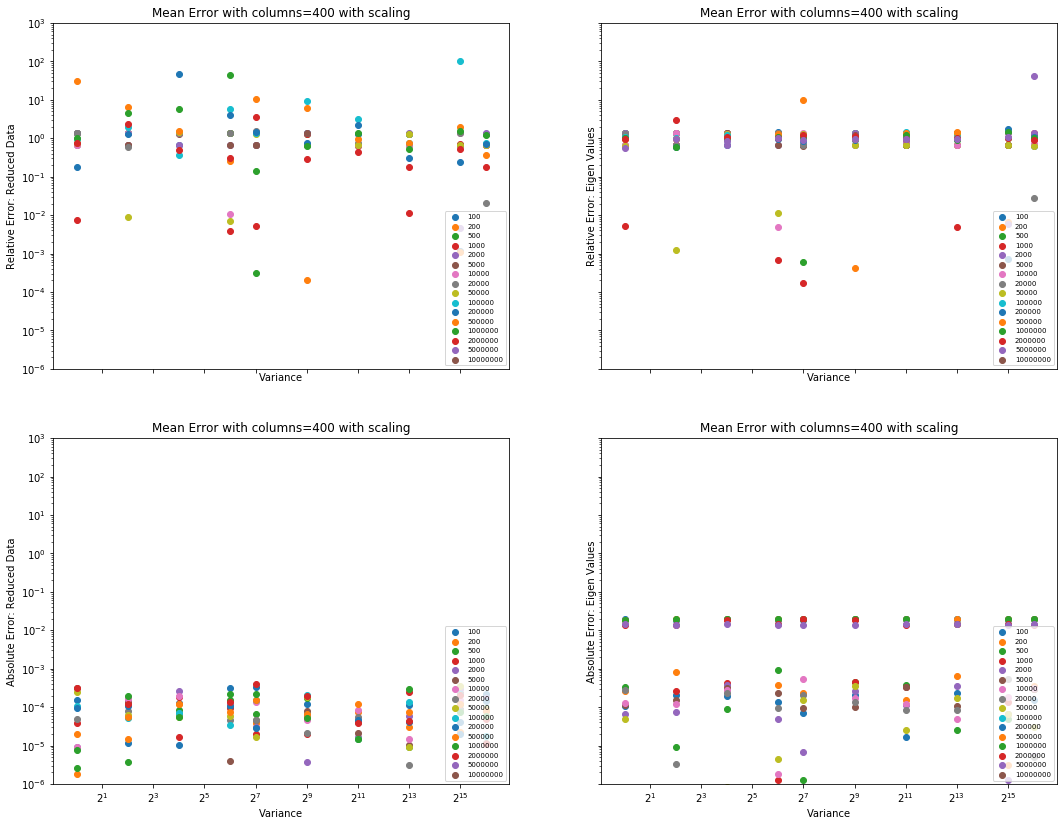

In [61]:
df = scaled
err_names = ["rel_deviation_data", "rel_deviation_eigv", "abs_deviation_data", "abs_deviation_eigv"]
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(18,14));
axs = axs.reshape(-1)
for i, err_name in enumerate(err_names):
    ax = axs[i]
    plot_data = {d:{n:get_var_err_data(n, d, err_name, df) for n in n_vals} for d in d_vals}
    for n, (variances, errs) in plot_data[400].items():
        ax.scatter(variances, errs, label=f"{n}")
        ax.set_xlabel("Variance")
        ax.set_ylabel(fancy_err_name[err_name])
        ax.set_title("Mean Error with columns=400 with scaling")
        ax.set_xscale("log", basex=2)
        ax.set_yscale("log", basey=10)
        ax.set_ylim(top=10**3, bottom=10**(-6))
        ax.legend(loc=4, prop={'size': 7})
        
fig.savefig("plots/scaling_400_errors_scatter.png")

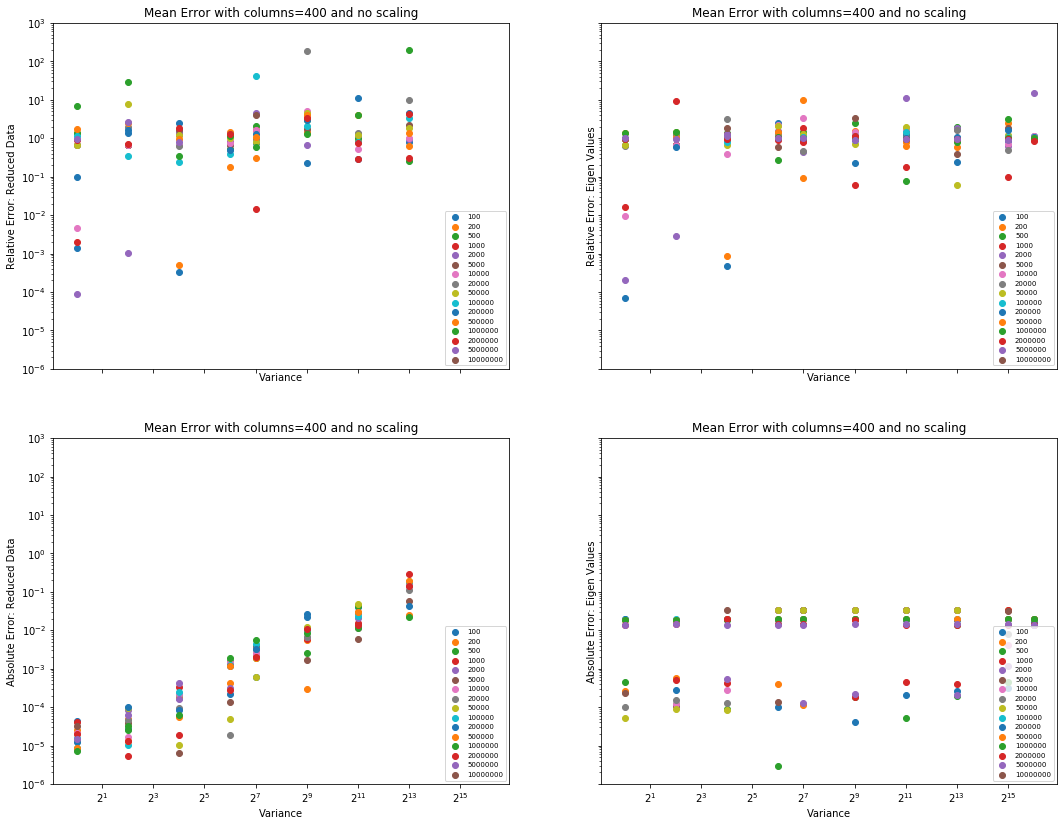

In [62]:
df = nscaled
err_names = ["rel_deviation_data", "rel_deviation_eigv", "abs_deviation_data", "abs_deviation_eigv"]
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(18,14));
axs = axs.reshape(-1)
for i, err_name in enumerate(err_names):
    ax = axs[i]
    plot_data = {d:{n:get_var_err_data(n, d, err_name, df) for n in n_vals} for d in d_vals}
    for n, (variances, errs) in plot_data[400].items():
        ax.scatter(variances, errs, label=f"{n}")
        ax.set_xlabel("Variance")
        ax.set_ylabel(fancy_err_name[err_name])
        ax.set_title("Mean Error with columns=400 and no scaling")
        ax.set_xscale("log", basex=2)
        ax.set_yscale("log", basey=10)
        ax.set_ylim(top=10**3, bottom=10**(-6))
        ax.legend(loc=4, prop={'size': 7})
        
fig.savefig("plots/no_scaling_400_errors_scatter.png")

## Speed

In [63]:
x = res.groupby(by=["Dimensions", "N"]).mean().iloc[:,-2:]

In [64]:
res.Dimensions.unique()

array([ 10,  50, 100, 200, 400])

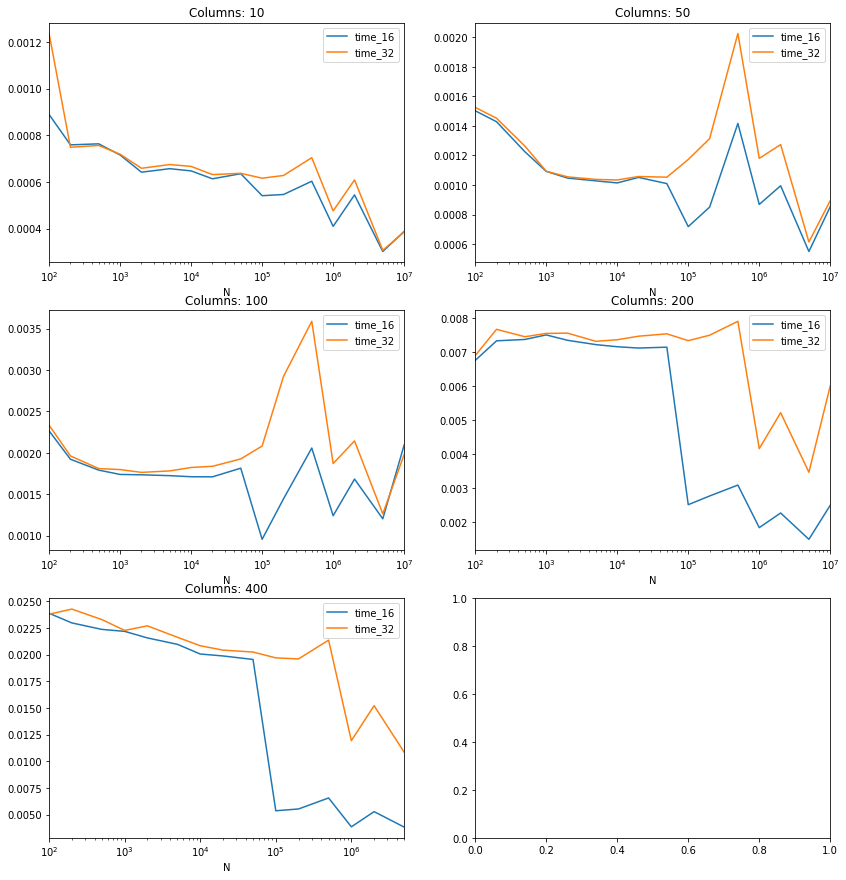

In [68]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
axes = axes.reshape(-1)

for i, dim in enumerate(res.Dimensions.unique()):
    x.loc[dim].plot(ax=axes[i])
    axes[i].set_title(f"Columns: {dim}")
    axes[i].set_xscale("log")
    
fig.savefig("plots/speed.png")

## Heatmap

In [66]:
scaled_pivots = [pd.pivot_table(scaled, values=e, index=['N'], columns='Variance') for e in err_names]
nscaled_pivots= [pd.pivot_table(nscaled,values=e, index=['N'], columns='Variance') for e in err_names]

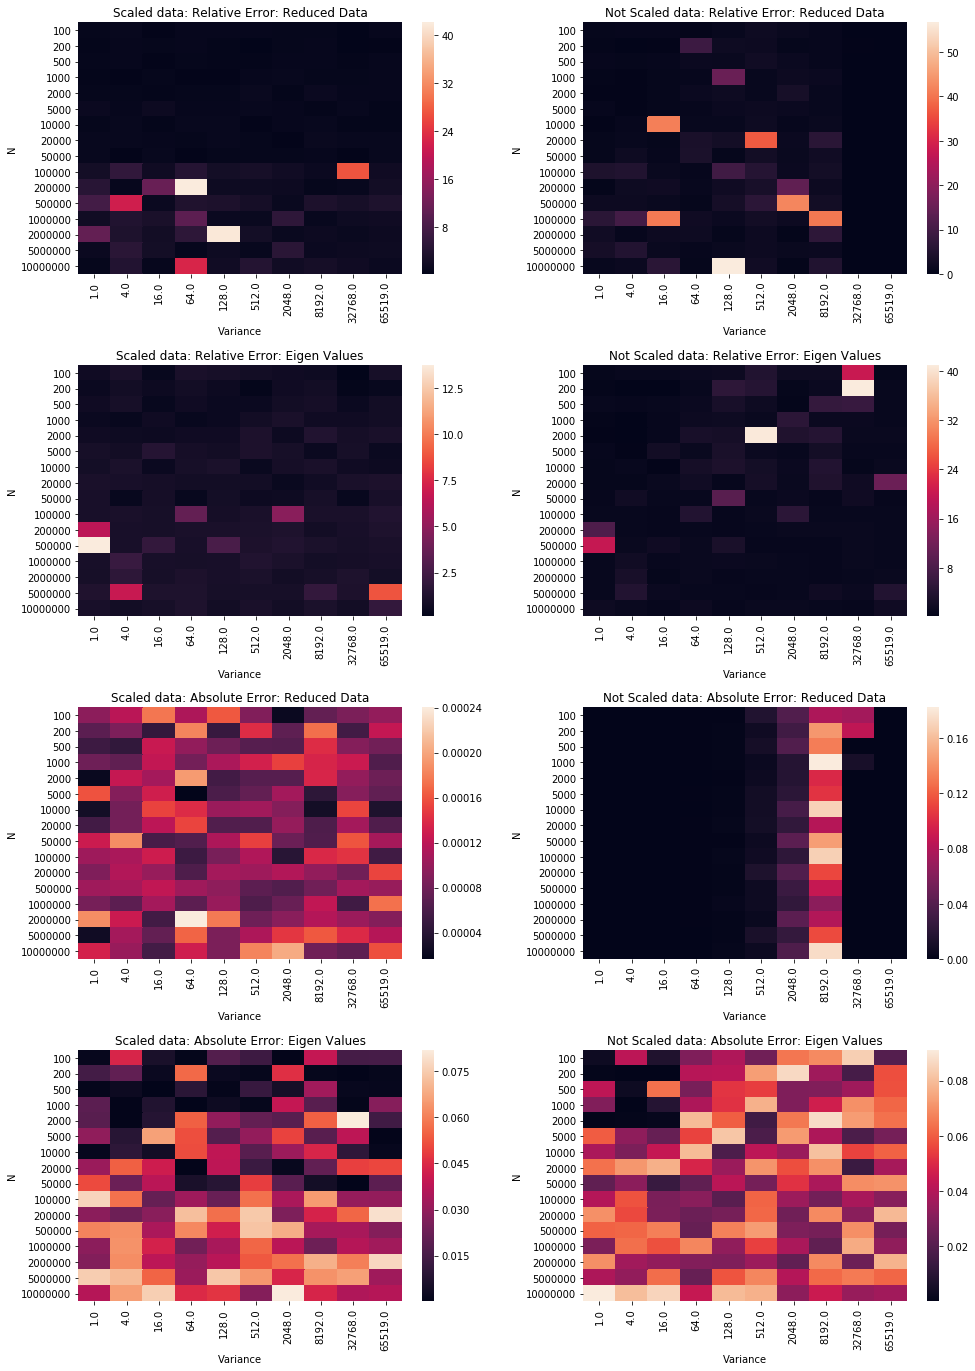

In [67]:
fig, axes = plt.subplots(4, 2, figsize=(15,20))
fig.tight_layout(pad=7.0)
axes = axes.reshape(-1)

for i in range(0,8,2):
    sns.heatmap(scaled_pivots[i//2],  ax=axes[i])
    axes[i].set_title(f"Scaled data: {fancy_err_name[err_names[i//2]]}")
    sns.heatmap(nscaled_pivots[i//2], ax=axes[i+1])
    axes[i+1].set_title(f"Not Scaled data: {fancy_err_name[err_names[i//2]]}")
    
fig.savefig("plots/heatmap.png")

## FP16 Representation

In [33]:
limits = [2**i for i in range(-13, 17)]
precis = [2**i for i in range(-24, 6)]
len(limits), len(precis)

(30, 30)

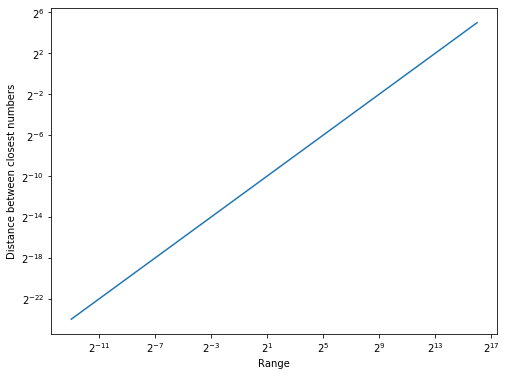

In [41]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.plot(limits, precis)
plt.xscale("log", basex=2)
plt.yscale("log", basey=2)
plt.xlabel("Range")
plt.ylabel("Distance between closest numbers")
plt.savefig("plots/fp16_precision.png")